In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


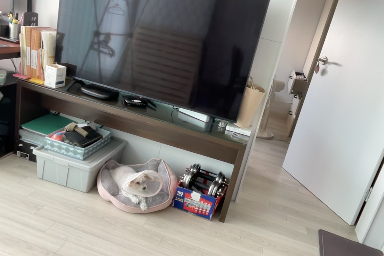

In [ ]:
#1-1

import cv2 as cv
from google.colab.patches import cv_imshow

img = cv.imread('/content/gdrive/MyDrive/MachineVision/assignment2/img001.jpg')

height = 256
ratio = float(height) / img.shape[0]
dsize = (int(img.shape[1]*ratio), height)
img = cv.resize(img, dsize)

cv_imshow(img)

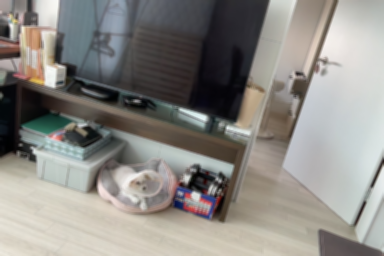

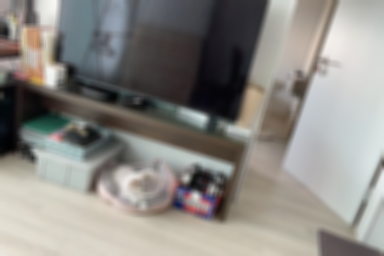

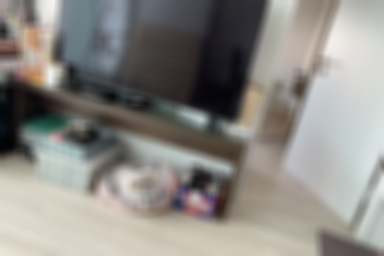

In [ ]:
#1-2

blur3x3 = cv.blur(img, ksize=(3,3))
cv_imshow(blur3x3)

blur7x7 = cv.blur(img, ksize=(7,7))
cv_imshow(blur7x7)

blur11x11 = cv.blur(img, ksize=(11,11))
cv_imshow(blur11x11)

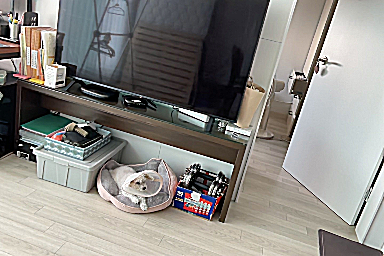

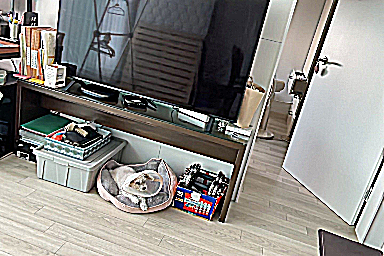

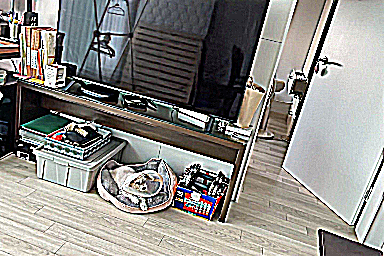

In [ ]:
#1-4

import numpy as np

blur5x5 = cv.blur(img, ksize=(5,5))
detail = np.int32(img) - np.int32(blur5x5)

alpha = 2
sharpened_img = np.int32(img) + alpha*detail
cv_imshow(sharpened_img)

alpha = 5
sharpened_img = np.int32(img) + alpha*detail
cv_imshow(sharpened_img)

alpha = 10
sharpened_img = np.int32(img) + alpha*detail
cv_imshow(sharpened_img)

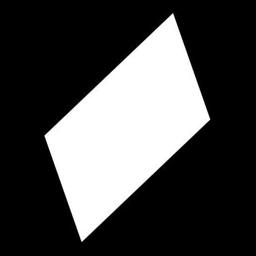

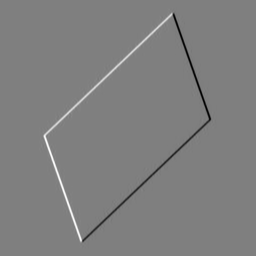

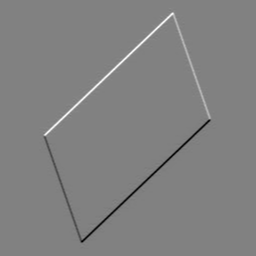

In [ ]:
#2-1

img = cv.imread('/content/gdrive/MyDrive/MachineVision/assignment2/rectangle.jpg', cv.IMREAD_GRAYSCALE)
cv_imshow(img)

lx = cv.Sobel(img, ddepth=cv.CV_64F, dx=1, dy=0, ksize=3)
ly = cv.Sobel(img, ddepth=cv.CV_64F, dx=0, dy=1, ksize=3)

lx_normalize = (lx - lx.min()) / (lx.max() - lx.min()) * 255
ly_normalize = (ly - ly.min()) / (ly.max() - ly.min()) * 255

cv_imshow(lx_normalize)
cv_imshow(ly_normalize)

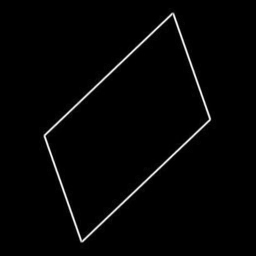

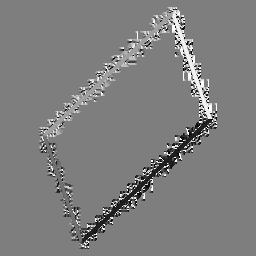

In [ ]:
#2-2
mag = np.sqrt(np.square(lx) + np.square(ly))
ori = np.arctan2(ly, lx) * 180/np.pi
  #[-180, 180], 원점이 왼쪽 위, x축 오른쪽, y축 아래쪽으로 향함

mag_normalize = (mag - mag.min()) / (mag.max() - mag.min()) * 255
ori_normalize = (ori - ori.min()) / (ori.max() - ori.min()) * 255

cv_imshow(mag_normalize)
cv_imshow(ori_normalize)
  #ori에서 가장 밝은 부분 : 180근처의 각
  #ori에서 가장 어두운 부분 : -180근처의 각

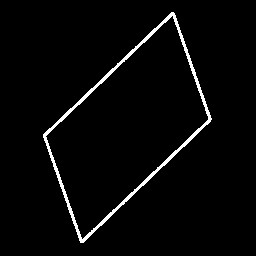

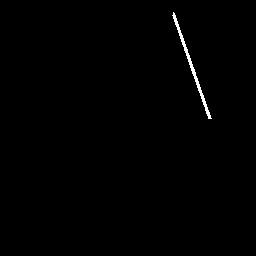

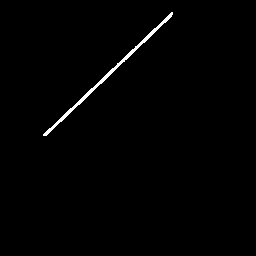

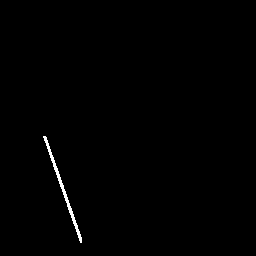

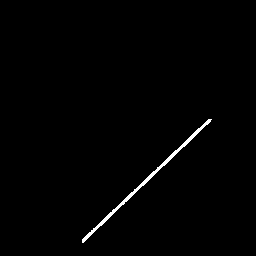

In [ ]:
#2-3

edges = np.zeros(img.shape)
id = np.where(mag > 100)
edges[id] = 255
cv_imshow(edges)

#grad = (90~180)
edge1 = np.zeros(img.shape)
id = np.where((mag > 100) & (ori > 90) & (ori < 180))
edge1[id] = 255
cv_imshow(edge1)

#grad = (0~90)
edge2 = np.zeros(img.shape)
id = np.where((mag > 100) & (ori > 0) & (ori < 90))
edge2[id] = 255
cv_imshow(edge2)

#grad = (-0~-90)
edge3 = np.zeros(img.shape)
id = np.where((mag > 100) & (ori < 0) & (ori > -90))
edge3[id] = 255
cv_imshow(edge3)

#grad = (-90~-180)
edge4 = np.zeros(img.shape)
id = np.where((mag > 100) & (ori < -90) & (ori > -180))
edge4[id] = 255
cv_imshow(edge4)

In [ ]:
#3-1

img = cv.imread('/content/gdrive/MyDrive/MachineVision/assignment2/img002.png', cv.IMREAD_GRAYSCALE)

edges1 = cv.Canny(img, threshold1=50, threshold2=100)
edges2 = cv.Canny(img, threshold1=100, threshold2=150)
edges3 = cv.Canny(img, threshold1=150, threshold2=200)


cv_imshow(img)
cv_imshow(edges1)
cv_imshow(edges2)
cv_imshow(edges3)

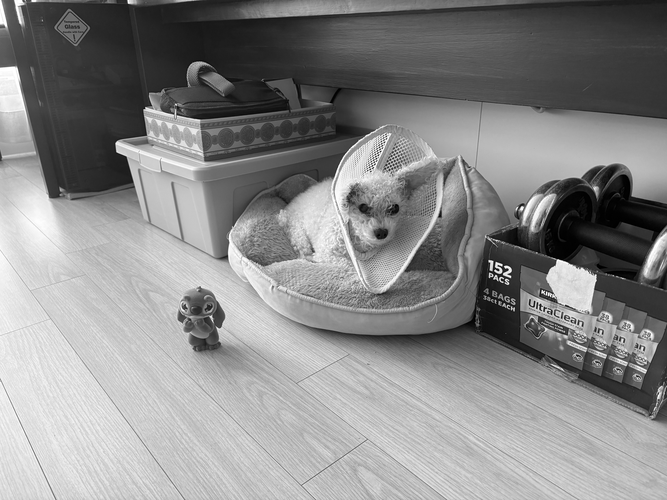

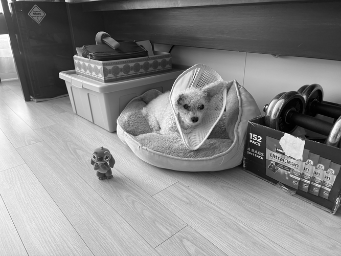

In [ ]:
#4-1

img = cv.imread('/content/gdrive/MyDrive/MachineVision/assignment2/stitch.png', cv.IMREAD_GRAYSCALE)
cv_imshow(img)

height = 256
ratio = float(height) / img.shape[0]
dsize = (int(img.shape[1]*ratio),height)
img = cv.resize(img,dsize)

cv_imshow(img)

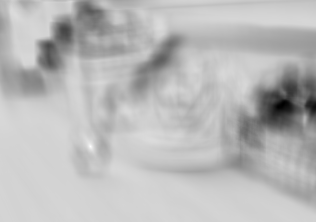

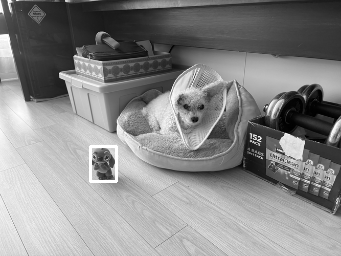

In [ ]:
template = cv.imread('/content/gdrive/MyDrive/MachineVision/assignment2/stitch_template.png', cv.IMREAD_GRAYSCALE)
w,h = template.shape[::-1]

img_result = cv.matchTemplate(img, template, cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img_result)
img_result_normalize = (img_result - img_result.min()) / (img_result.max() - img_result.min()) * 255

img_rect = img.copy()
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img_rect, top_left, bottom_right, 255, 2)

cv_imshow(template)
cv_imshow(img_result_normalize)
cv_imshow(img_rect)

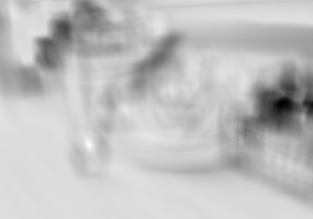

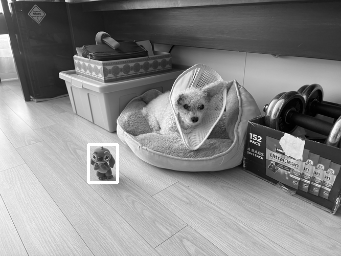

In [ ]:
template = cv.imread('/content/gdrive/MyDrive/MachineVision/assignment2/stitch_template.png', cv.IMREAD_GRAYSCALE)
#2배로 upscale
template2 = cv.resize(template, None, fx=1.1, fy=1.1, interpolation=cv.INTER_CUBIC)
w,h = template2.shape[::-1]

img_result2 = cv.matchTemplate(img, template2, cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img_result2)
img_result2_normalize = (img_result2 - img_result2.min()) / (img_result2.max() - img_result2.min()) * 255

img_rect2 = img.copy()
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img_rect2, top_left, bottom_right, 255, 2)


cv_imshow(template2)
cv_imshow(img_result2_normalize)
cv_imshow(img_rect2)